In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from subprocess import call

In [27]:
df = pd.read_csv("../data/train.csv")

In [28]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
df["Sex"].loc[df["Sex"]=="male"]=1
df["Sex"].loc[df["Sex"]=="female"]=0

/home/pi/Projects/cpp/Kaggle/Titanic/venv/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [58]:
features = ["Sex","Pclass","SibSp","Parch"]
train_df, val_df = train_test_split(df,test_size=0.2)
train_X, train_y = train_df[features], train_df.Survived
test_X, test_y = val_df[features], val_df.Survived

In [59]:
model = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=1)
model.fit(train_X, train_y)

RandomForestClassifier(max_depth=2, random_state=1)

In [60]:
# Make predictions for the test set
pred_test_y = model.predict(test_X)
pred_train_y = model.predict(train_X)

In [61]:
# View accuracy score
accuracy_score(test_y, pred_test_y)

0.7877094972067039

In [62]:
accuracy_score(train_y, pred_train_y)

0.8132022471910112

In [63]:
# View confusion matrix for test data and predictions
cm = confusion_matrix(test_y, pred_test_y)

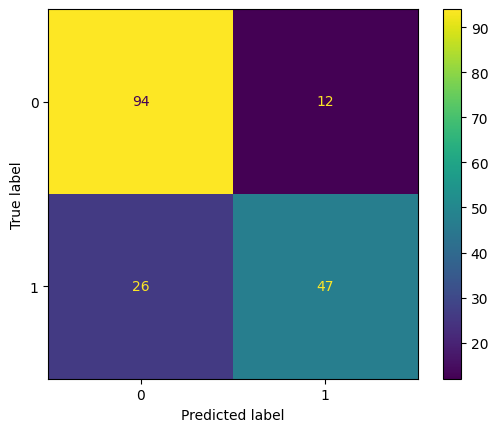

In [64]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [65]:
# View the classification report for test data and predictions
print(classification_report(test_y, pred_test_y))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       106
           1       0.80      0.64      0.71        73

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.78       179



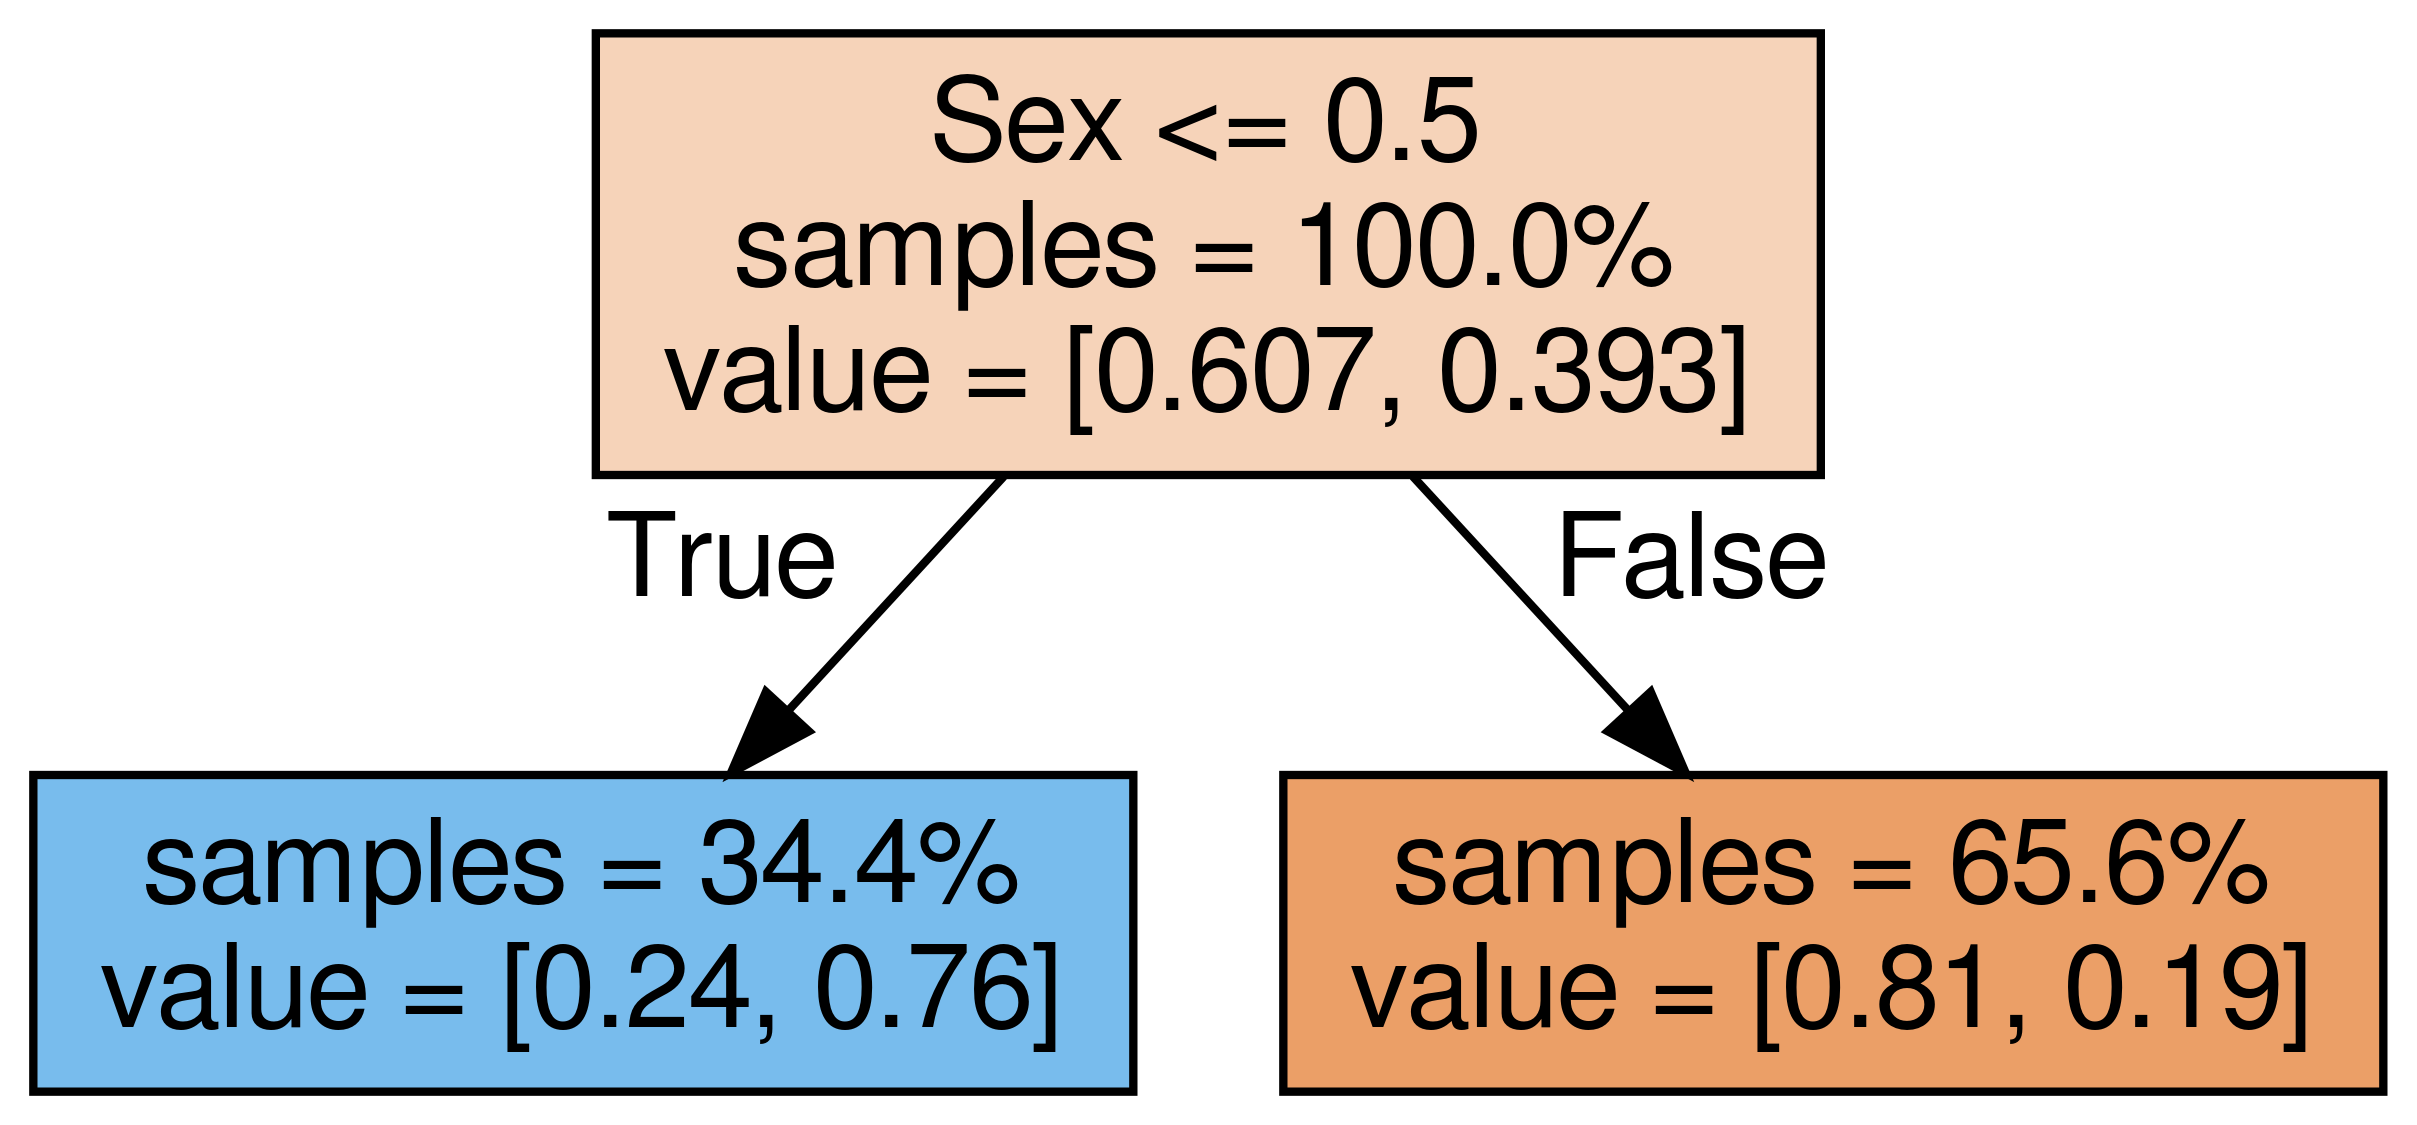

In [48]:
tree = model.estimators_[0]
dot_data = export_graphviz(tree, out_file='tree.dot',feature_names=X.columns,filled=True,max_depth=2,impurity=False,proportion=True)
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

In [6]:
sex_df = train_df[["Sex","Survived"]].loc[train_df["Sex"].notna()]

In [18]:
women = np.array(sex_df.loc[train_df["Sex"] == "female"]["Survived"])
np.sum(women)/women.size

0.7420382165605095

In [21]:
men = np.array(sex_df.loc[train_df["Sex"] == "male"]["Survived"])
np.sum(men)/men.size

0.18890814558058924

In [20]:
age_df = data_df[["Age","Survived"]]
age_df = age_df.loc[age_df["Age"].notna()]

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


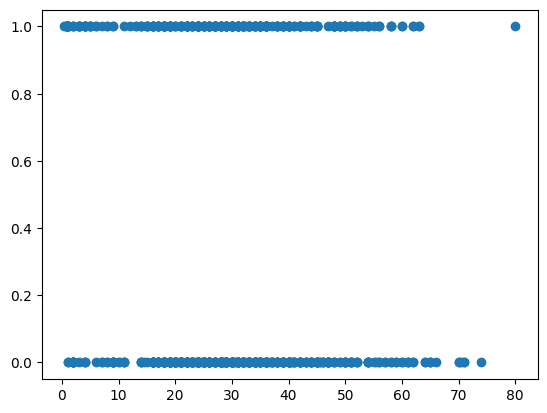

In [4]:
x = np.array(age_df["Age"])
y = np.array(age_df["Survived"])

plt.scatter(x, y)
plt.show()

In [26]:
y = train_df["Survived"]

features = ["Pclass", "SibSp", "Parch"]
X = train_df[features]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

RandomForestClassifier(max_depth=5, random_state=1)

In [27]:
predictions = model.predict(X)

In [32]:
y.size-np.sum(predictions==y)

0.2783389450056117

In [33]:
model.predict_proba(X)

array([[0.69168848, 0.30831152],
       [0.25978437, 0.74021563],
       [0.78789139, 0.21210861],
       ...,
       [0.64032989, 0.35967011],
       [0.46622515, 0.53377485],
       [0.78789139, 0.21210861]])